In [267]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [480]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")
data_semNF = pd.read_csv("nge_dados_input_semNF.csv")

In [269]:
data.head()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
0,224323,0,0,1,0,87,140.0,116142,470,685,60.0,140
1,224325,0,0,1,0,82,122.0,108307,76,94,69.0,122
2,225392,0,0,3,0,41,70.0,41144,28,24,23.0,52
3,225392,0,0,3,0,41,70.0,62913,397,639,21.0,52
4,225531,0,0,2,0,36,48.0,37548,233,397,17.0,48


In [338]:
#
# normalizar a quantidade de caracteres
#
data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [271]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [339]:
data.dtypes
# baixa complexidade ==> 48 páginas 
# media complexidade ==> 49/64 páginas
# alta complexidade  ==> 65 acima

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
qtd_carc_normal     float64
dtype: object

In [340]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,qtd_carc_normal
count,108.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,230475.212963,0.268519,0.064815,1.444444,0.0,60.916667,93.759259,77540.694444,257.916667,340.768519,25.314815,78.518519,0.135330
std,22559.684178,0.573666,0.247347,0.631470,0.0,61.165644,68.238021,86924.309341,153.689098,203.278714,14.175567,61.064924,0.152117
min,3.000000,0.000000,0.000000,0.000000,0.0,12.000000,18.000000,209.000000,2.000000,2.000000,1.000000,18.000000,0.000000
25%,231018.250000,0.000000,0.000000,1.000000,0.0,31.750000,48.000000,29249.000000,127.500000,169.250000,17.750000,44.000000,0.050820
50%,233439.500000,0.000000,0.000000,1.000000,0.0,46.000000,75.000000,54855.000000,279.000000,337.500000,23.000000,68.000000,0.095630
75%,235307.000000,0.000000,0.000000,2.000000,0.0,73.750000,110.000000,98649.000000,387.500000,447.250000,28.250000,89.000000,0.172269
max,235831.000000,2.000000,1.000000,3.000000,0.0,543.000000,420.000000,571640.000000,526.000000,792.000000,71.000000,386.000000,1.000000


In [343]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc', 'qtd_tabela',
       'qtd_image', 'qtd_estilos', 'pag_final', 'qtd_carc_normal'],
      dtype='object')

In [344]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']

colunas_y=['pag_final']
#colunas_y=['id',  'pag_final']

X = data[colunas_X]
y = data[colunas_y]

In [345]:
X.tail()

,complexidade,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,qtd_carc_normal
103,1,56,51127,356,365,18.0,0.089106
104,2,38,40157,339,325,16.0,0.069909
105,2,33,42499,293,303,15.0,0.074007
106,2,33,28573,413,391,15.0,0.049637
107,2,12,940,432,415,4.0,0.001279


In [277]:
data

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
0,224323,0,0,1,0,87,140.0,116142,470,685,60.0,140
1,224325,0,0,1,0,82,122.0,108307,76,94,69.0,122
2,225392,0,0,3,0,41,70.0,41144,28,24,23.0,52
3,225392,0,0,3,0,41,70.0,62913,397,639,21.0,52
4,225531,0,0,2,0,36,48.0,37548,233,397,17.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...
103,235514,1,1,1,0,56,104.0,51127,356,365,18.0,72
104,235700,1,1,2,0,38,48.0,40157,339,325,16.0,44
105,235701,1,1,2,0,33,44.0,42499,293,303,15.0,40
106,235710,1,1,2,0,33,72.0,28573,413,391,15.0,48


In [278]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
count,108.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,230475.212963,0.268519,0.064815,1.444444,0.0,60.916667,93.759259,77540.694444,257.916667,340.768519,25.314815,78.518519
std,22559.684178,0.573666,0.247347,0.631470,0.0,61.165644,68.238021,86924.309341,153.689098,203.278714,14.175567,61.064924
min,3.000000,0.000000,0.000000,0.000000,0.0,12.000000,18.000000,209.000000,2.000000,2.000000,1.000000,18.000000
25%,231018.250000,0.000000,0.000000,1.000000,0.0,31.750000,48.000000,29249.000000,127.500000,169.250000,17.750000,44.000000
50%,233439.500000,0.000000,0.000000,1.000000,0.0,46.000000,75.000000,54855.000000,279.000000,337.500000,23.000000,68.000000
75%,235307.000000,0.000000,0.000000,2.000000,0.0,73.750000,110.000000,98649.000000,387.500000,447.250000,28.250000,89.000000
max,235831.000000,2.000000,1.000000,3.000000,0.0,543.000000,420.000000,571640.000000,526.000000,792.000000,71.000000,386.000000


In [279]:
y.head()

,pag_final
0,140
1,122
2,52
3,52
4,48


# Normalizar?

In [280]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [281]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [282]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

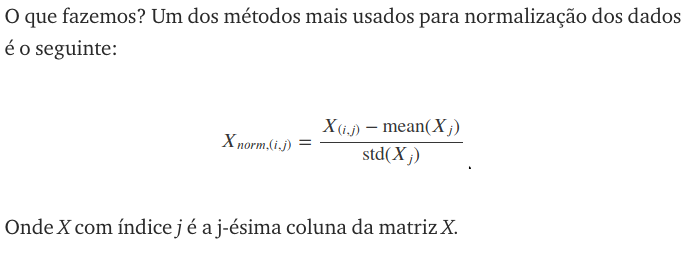

In [283]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [284]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [285]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [286]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [287]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [470]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [471]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [472]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 4), (11, 4), (97, 1), (11, 1))

In [473]:
y_test.head()

,pag_final
77,108
10,40
4,48
83,54
62,46


In [474]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_train, y_train)

<ipython-input-474-957cc5138365>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [475]:
p = modelo.predict(X_test)

In [476]:
p

array([140,  40,  48,  52,  38, 110, 140,  68,  40,  48, 110])

In [477]:
print(p.shape,y_test.shape)

(11,) (11, 1)


In [478]:
y_test

,pag_final
77,108
10,40
4,48
83,54
62,46
67,176
30,100
45,76
95,44
11,46


In [479]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046
# RMSE:  19.371957239079567
# RMSE:  53.665631459994955
# RMSE:  26.642413213111567 sem a feature quantidade de estilo


RMSE:  26.642413213111567


In [ ]:
##############################################################################################################

In [ ]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [ ]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
##############################################################################################################

In [ ]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [481]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']

colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

KeyError: "['qtd_carc_normal'] not in index"

In [ ]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1)

In [482]:
X_train

,qtd_pag_word,qtd_tabela,qtd_image,qtd_carc_normal
79,17,440,422,0.054253
0,87,470,685,0.202882
80,86,87,171,0.178083
18,54,395,637,0.149287
69,66,4,5,0.000000
...,...,...,...,...
71,67,109,185,0.212103
14,18,152,253,0.028675
92,29,4,4,0.041513
51,41,526,792,0.074305


In [483]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print(linreg.coef_)


[17.40267532]
[[ 7.25529599e-01  2.09592935e-02 -2.47488001e-02  1.51045108e+02]]


In [484]:
colunas_X

['qtd_pag_word', 'qtd_tabela', 'qtd_image', 'qtd_carc_normal']

In [485]:
X_train.columns

Index(['qtd_pag_word', 'qtd_tabela', 'qtd_image', 'qtd_carc_normal'], dtype='object')

In [486]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('qtd_pag_word',
  array([ 7.25529599e-01,  2.09592935e-02, -2.47488001e-02,  1.51045108e+02]))]

In [487]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [488]:
y_pred

array([[102.05891617],
       [ 38.61710933],
       [ 48.44971889],
       [ 66.31778469],
       [ 48.84610396],
       [185.66924273],
       [ 96.80440284],
       [ 65.01297806],
       [ 48.40284148],
       [ 56.23046453],
       [118.9487554 ]])

In [489]:
y_test

,pag_final
77,108
10,40
4,48
83,54
62,46
67,176
30,100
45,76
95,44
11,46


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [438]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [439]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43
# RMSE:  12.051420343980208
# RMSE:  9.782602553564418 => melhorou quando retirou feature complexidade
# RMSE:  9.16223875809479 => melhorou quando retirou feature quantidade de estilos


RMSE:  9.16223875809479


In [63]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976
# RMSE:  12.43000991830557
# RMSE:  14.428565435305106


In [ ]:
######## //////////// TESTE COM ARQUIVOS SEM NF

In [498]:
#
# normalizar a quantidade de caracteres
#
data_semNF.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [499]:
colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
X_semNF= data_semNF[colunas_X]

In [515]:
#Fazendo predições no conjunto de teste
y_pred_semNF = linreg.predict(X_semNF)

In [516]:
print(y_pred_semNF)

[[ 73.52927794]
 [ 67.88133584]
 [ 79.46194002]
 [ 52.85423647]
 [ 45.89467906]
 [ 62.15721016]
 [ 59.3014501 ]
 [131.79008785]
 [106.20717059]
 [ 83.57541821]
 [ 54.50319481]
 [ 65.76592769]
 [ 75.06901732]
 [329.74498511]
 [294.3067359 ]
 [ 72.2019305 ]
 [ 59.96958331]]


In [504]:
print(data_semNF["qtd_pag_estimado"])

0      48
1      48
2      98
3      48
4      46
5      46
6      46
7     198
8     110
9      68
10     75
11     70
12    114
13    460
14    420
15     48
16     48
Name: qtd_pag_estimado, dtype: int64


In [540]:
#y_pred_semNF = pd.Series(y_pred_semNF,name=["qtd_pag_inferido"])

resultado_comparativo =  pd.concat([pd.Series(y_pred_semNF.T[0]), data_semNF["qtd_pag_estimado"]], axis=1)


In [541]:
resultado_comparativo

,0,qtd_pag_estimado
0,73.529278,48
1,67.881336,48
2,79.461940,98
3,52.854236,48
4,45.894679,46
5,62.157210,46
6,59.301450,46
7,131.790088,198
8,106.207171,110
9,83.575418,68


In [ ]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [ ]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [411]:
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1)

In [413]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


[ 46  96  36  98  48  42  44  48  52  46 100]
[[3.42803343e-16 2.12908425e-03 6.01756560e-04 1.95175171e-07
  2.06784408e-02 1.98830401e-03 6.82398140e-17 2.17098374e-01
  6.68106988e-04 3.13945001e-07 1.48775582e-02 4.21974103e-01
  2.60600975e-01 5.05021834e-06 2.43289752e-02 1.16838361e-04
  7.94006893e-03 3.53583836e-03 1.48513180e-04 1.33600087e-03
  2.77174576e-03 2.00828613e-05 1.88171412e-14 2.27113212e-03
  3.45713820e-04 4.31813652e-08 5.96389595e-04 1.67500590e-06
  6.40768164e-08 1.22478215e-02 8.59994890e-05 6.59629339e-04
  4.71111769e-05 1.25422506e-09 5.90308221e-06 1.10426107e-04
  8.65577037e-11 3.21623896e-05 2.67516430e-03 1.40315172e-05
  1.53998553e-20 8.63924222e-05 1.34278569e-08 1.62201693e-10]
 [4.45935649e-10 4.65145244e-13 9.59031862e-16 3.47513477e-07
  2.65430301e-07 3.62858139e-09 2.43899537e-13 1.82234921e-07
  2.67836163e-04 1.68256046e-07 2.86054551e-08 5.40168816e-11
  9.26327972e-08 1.57449611e-02 1.83016022e-06 6.89097095e-04
  2.28162708e-03 6.8134

/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [414]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test)

[ 46  96  36  98  48  42  44  48  52  46 100]
     pag_final
100         30
90          82
92          40
89          66
101         42
55          34
88          78
54          68
48          92
66          24
58          52


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [415]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# RMSE:  26.17424132789543
# quantidade de estilo é muito relevante nesse modelo, sem essa feature RMSE:  106.26211160915429


RMSE:  26.17424132789543


In [ ]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [ ]:
#
# 
################################################################################################################

In [205]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))

dados verdadeiros:  [100, 50, 30, 30]
dados inferidos: [90, 50, 50, 30]
erro médio absoluto:  7.5
erro médio absoluto:  7.5
MSE:  125.0
MSE:  125.0
RMSE:  11.180339887498949
RMSE:  11.180339887498949
